# Climate Data Analysis

Various climate variables and factors will be collected, processed, and interpreted in this climate data analysis project. This project aims for exploratory data analysis (EDA) of climate data, focusing on visualizing trends and relationships between climate variables, such as sea surface temperature, wind speed, and geographical area.

The following shows which sign/symbol belongs to which variable:
- Latitude, Wind Direction, and Longitude are in degrees (°).
- Ice Accretion On Ship is in millimeters (mm).
- Sea Level Pressure and Air Temperature are in degrees Celsius (°C).
- Wave Height is in meters (m).
- Total Cloud Amount is in percentage (%).
- Visibility is in kilometers (km).
- Wind Speed is in meters per second (m/s).

In [80]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

In [83]:
#Load climate data from a CSV file
data = pd.read_csv('Marine_CSV_sample.csv')

#Data cleaning and preprocessing
#Remove rows with missing values
data.dropna(inplace = True)

#Convert Time of Observation to a datetime format
data['Time of Observation'] = pd.to_datetime(data['Time of Observation']) #This conversion is essential for time-based analysis.

#Select specific columns for analysis
selected_columns = ['Latitude', 'Longitude', 'Ice Accretion On Ship', 'Sea Level Pressure', 'Air Temperature', 'Sea Surface Temperature', 'Wave Height', 'Total Cloud Amount', 'Visibility', 'Wind Direction', 'Wind Speed', 'Time of Observation']

#Extract the selected columns from the data
selected_data = data[selected_columns]

#Statistical analysis
#Calculate mean, median, and standard deviation for each selected column
statistics = selected_data.describe()

In [82]:
#Displays information, structure, and characteristics about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Identification                        55 non-null     object        
 1   Latitude                              55 non-null     float64       
 2   Longitude                             55 non-null     float64       
 3   Time of Observation                   55 non-null     datetime64[ns]
 4   Ice Accretion On Ship                 55 non-null     object        
 5   Thickness of Ice Accretion On Ship    55 non-null     object        
 6   Rate of Ice Accretion on Ship         55 non-null     object        
 7   Sea Level Pressure                    55 non-null     object        
 8   Characteristics of Pressure Tendency  55 non-null     object        
 9   Pressure Tendency                     55 non-null     object        
 10  Air 

Observations:
1. There are 55 entries and 33 columns
2. The "Identification," "Latitude," "Longitude," and "Time of Observation" columns have 55 non-null entries and are of type object, float64, and datetime64
3. Memory usage for this DataFrame is approximately 14.3 KB

In [68]:
#You can see the first five variables elements/rows in dataset
data.head()

,Identification,Latitude,Longitude,Time of Observation,Ice Accretion On Ship,Thickness of Ice Accretion On Ship,Rate of Ice Accretion on Ship,Sea Level Pressure,Characteristics of Pressure Tendency,Pressure Tendency,...,Cloud Height Indicator,Cloud Height,Middle Cloud Type,High Cloud Type,Visibility,Visibility Indicator,Present Weather,Past Weather,Wind Direction,Wind Speed
0,D5GN6,-35.8,2.9,2015-01-12 00:00:00,,,,29.83,8,0.0,...,,5,,,97,,3,2,300,139
1,D5GN6,-35.9,6.9,2015-01-12 12:00:00,,,,29.93,1,0.0,...,,2,1,A,97,,2,2,180,165
2,D5GN6,-35.9,8.6,2015-01-12 18:00:00,,,,30.02,1,0.0,...,,2,0,0,97,,2,2,170,154
3,D5GN6,-35.7,11.9,2015-01-13 06:00:00,,,,30.14,0,0.0,...,,3,0,0,98,,1,2,140,118
4,D5GN6,-35.6,13.7,2015-01-13 12:00:00,,,,30.12,8,,...,,5,7,A,98,,2,1,160,123


In [69]:
#Printing the summary statistics for the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,55.0,-20.558182,13.168181,-35.9,-32.3,-23.9,-11.20,6.1
Longitude,55.0,51.829091,27.141806,2.9,29.0,51.2,75.95,94.6
Visibility,55.0,97.527273,0.503857,97.0,97.0,98.0,98.00,98.0
Wind Direction,55.0,161.127273,99.436757,20.0,90.0,140.0,215.00,362.0
Wind Speed,55.0,108.345455,69.483336,10.0,69.5,108.0,139.00,463.0


Observations:
1. For "Latitude," "Longitude," "Visibility," "Wind Direction," and "Wind Speed," there are 55 non-null entries.
2. The average latitude is around -20.56 degrees, with a standard deviation of approximately 13.17 degrees, indicating variability.
3. The southernmost point recorded is -35.9 degrees, while the northernmost is 6.1 degrees. In terms of longitude, the average is about 51.83 degrees, with a standard deviation of 27.14 degrees.
4. The dataset covers from the westernmost point at 2.9 degrees to the easternmost at 94.6 degrees.
5. Visibility shows little variation with an average of 97.53 degrees.
6. Wind direction exhibits a broader range, with an average of 161.13 degrees and notable standard deviation of 99.44 degrees.
7. Wind speed, with an average of 108.35 degrees and a standard deviation of 69.48 degrees, reflects variability.

# Algorithms

## K-Means Clustering Algorithm

In [101]:
# Handling missing values
cluster_data.dropna(inplace=True)  # Drop rows with missing values
cluster_data = cluster_data.apply(pd.to_numeric, errors='coerce')

# Check if there is any data remaining
if cluster_data.shape[0] == 0:
    print("No data remaining after handling missing values and conversion to numeric.")
else:
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)

    # Determine the optimal number of clusters using the Elbow method
    wcss = []  # within-cluster sum of squares

    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow method to find the optimal number of clusters
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')  # within-cluster sum of squares
    plt.show()

    # Based on the Elbow method, let's choose the optimal number of clusters (for example, 3)
    optimal_clusters = 3

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Visualize the clusters on a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=cluster_data, palette='viridis', legend='full', s=50)
    plt.title('Clustering of Marine Data')
    plt.show()

No data remaining after handling missing values and conversion to numeric.


Observation:
After handling missing values and converting the data to numeric, there is no data remaining in my dataset.

## Regression Algorithm

In [110]:
# Display the number of rows and columns in the dataset
print(regression_data.shape)

# Display the count of missing values in each column
print(regression_data.isnull().sum())

# Impute missing values instead of dropping rows
regression_data[features] = regression_data[features].apply(pd.to_numeric, errors='coerce')
regression_data[features] = regression_data[features].fillna(regression_data[features].mean())
regression_data[features] = regression_data[features].fillna(regression_data[features].median())

# Check if the dataset is large enough for the train-test split
if len(regression_data) < 2:
    print("Insufficient data for train-test split.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(regression_data[features], regression_data[target_variable], test_size=0.2, random_state=0)

    # Standardize the features (optional, but can be beneficial for certain regression models)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Plot the actual vs. predicted values
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Sea Surface Temperature')
    plt.ylabel('Predicted Sea Surface Temperature')
    plt.title('Actual vs. Predicted Sea Surface Temperature')
    plt.show()

(0, 12)
Latitude                   0.0
Longitude                  0.0
Ice Accretion On Ship      0.0
Sea Level Pressure         0.0
Air Temperature            0.0
Sea Surface Temperature    0.0
Wave Height                0.0
Total Cloud Amount         0.0
Visibility                 0.0
Wind Direction             0.0
Wind Speed                 0.0
Time of Observation        0.0
dtype: float64
Insufficient data for train-test split.


# Data Visualization

## Time series analysis to identify trends

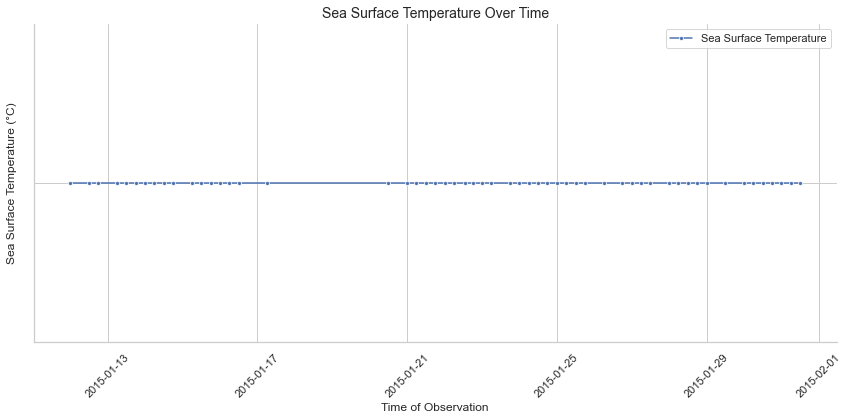

In [84]:
#Set the style and context of the plot
sns.set_style("whitegrid")
sns.set_context("notebook")

#Create a line plot with seaborn
plt.figure(figsize = (12, 6))#12 units in width and 6 units in height
sns.lineplot(x=pd.to_datetime(selected_data['Time of Observation'], format='%Y-%m-%dT%H:%M:%S'), y=selected_data['Sea Surface Temperature'], marker="o", color="b", markersize=4, label="Sea Surface Temperature")
plt.title('Sea Surface Temperature Over Time', fontsize = 14)
plt.xlabel('Time of Observation', fontsize = 12)
plt.ylabel('Sea Surface Temperature (°C)', fontsize = 12)
plt.xticks(rotation = 45)  #Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

#Add grid lines and customize the plot
sns.despine()
plt.tight_layout()

plt.show()

## Scatter Plot

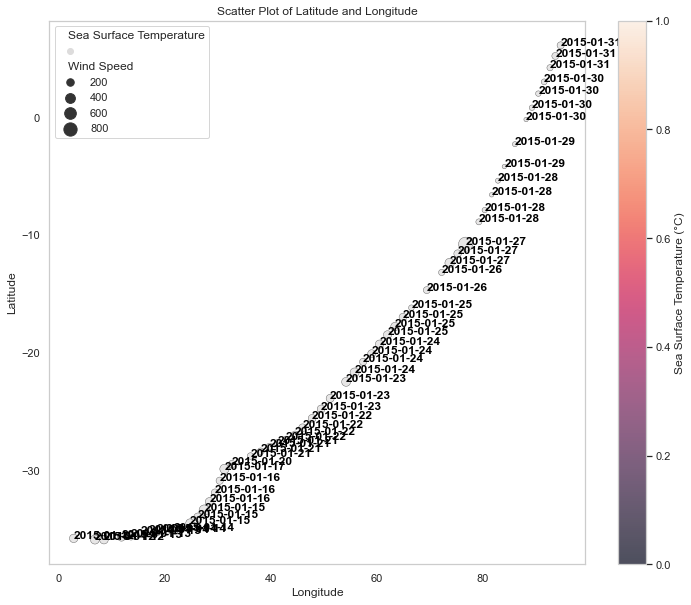

In [85]:
plt.figure(figsize=(12, 10))

# Customize marker size based on wind speed (scaled for visibility)
point_size = selected_data['Wind Speed'] * 2

# Create the scatter plot with enhanced aesthetics
scatter = sns.scatterplot( #creates the scatter plot
    x='Longitude',
    y='Latitude',
    data=selected_data,
    alpha=0.7, #sets the transparency of the data points to 0.7, making them partially transparent
    size=point_size, #defines the size of the data points, which was customized based on wind speed
    sizes=(20, 200), #sets the range of marker sizes. In this case, the smallest marker size is 20, and the largest is 200
    hue='Sea Surface Temperature',  # Color-coding based on temperature
    palette='coolwarm',
    legend='brief',  # Show legend
    edgecolor='k',  # Marker edge color
)

# Assign the scatter plot to a mappable
mappable = scatter.get_children()[0]

# Add tooltips for data points
for line in range(0, selected_data.shape[0]):
    scatter.text(
        selected_data['Longitude'][line] + 0.01,
        selected_data['Latitude'][line],
        selected_data['Time of Observation'][line].strftime("%Y-%m-%d"),
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold',
    )

# Customize the legend and labels
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Turn off the grid
plt.grid(False)

# Show the color bar associated with the mappable
cbar = plt.colorbar(mappable)
cbar.set_label('Sea Surface Temperature (°C)')

plt.show()

## Histogram

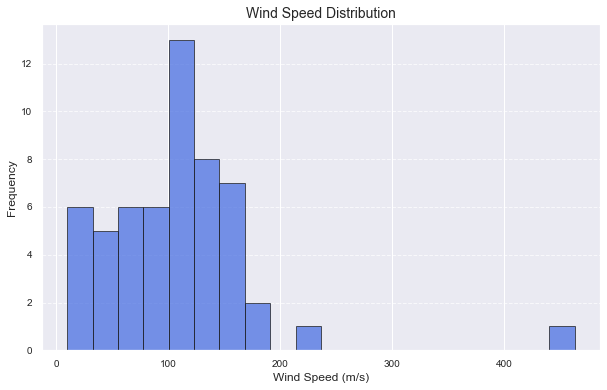

In [93]:
# Create a visually enhanced histogram
plt.figure(figsize=(10, 6)) #10 units in width and 6 units in height

# Define the number of bins and colors
num_bins = 20
bar_color = 'royalblue'
edge_color = 'k'

# Plot the histogram
plt.hist(selected_data['Wind Speed'], bins=num_bins, color=bar_color, edgecolor=edge_color, alpha=0.7)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Wind Speed Distribution', fontsize=14)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Box Plot

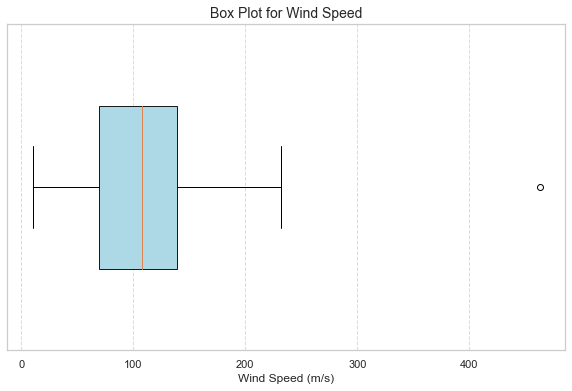

In [86]:
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')  # Set the Seaborn style to 'whitegrid,' providing a white grid background for the plot

# Create the box plot with patch_artist=True
boxprops = dict(facecolor='lightblue', edgecolor='k')
plt.boxplot(selected_data['Wind Speed'], vert=False, widths=0.5, patch_artist=True, boxprops=boxprops)

# Customize the plot appearance
plt.title('Box Plot for Wind Speed', fontsize=14)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.yticks([])  # Remove y-axis ticks for a cleaner appearance
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for the x-axis

# Show the plot
plt.show()

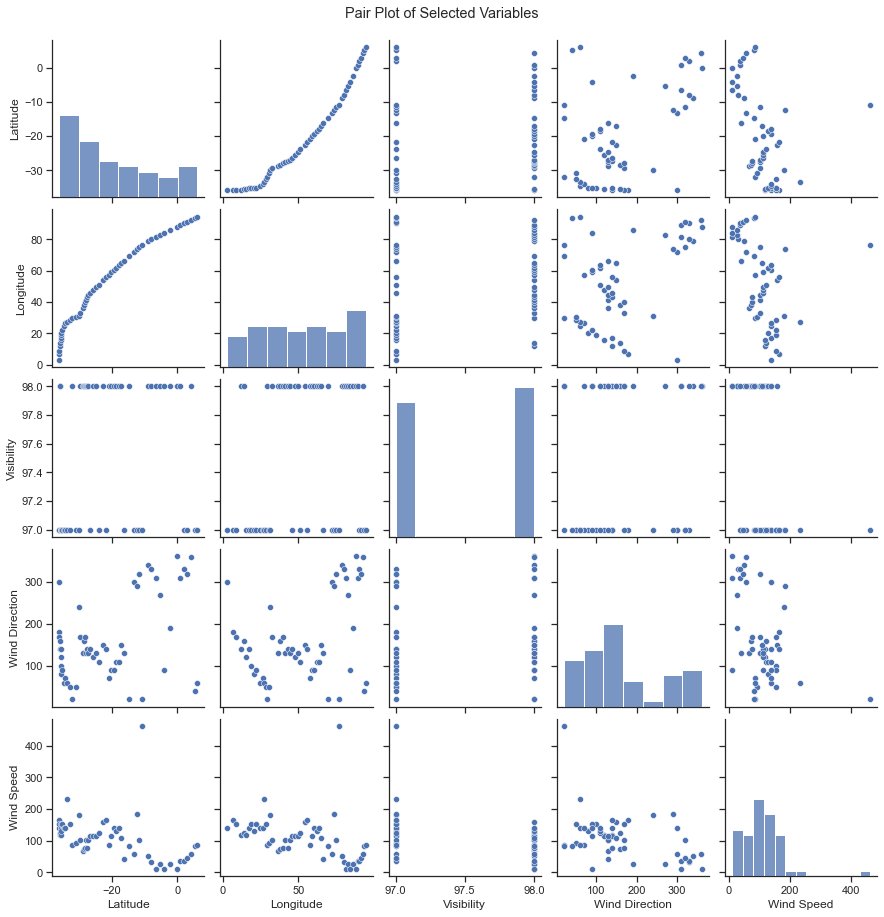

In [87]:
#Pair plot for selected variables
sns.set(style = "ticks")
sns.pairplot(selected_data)
plt.suptitle("Pair Plot of Selected Variables", y = 1.02)
plt.show()

## Correlation Heatmap

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


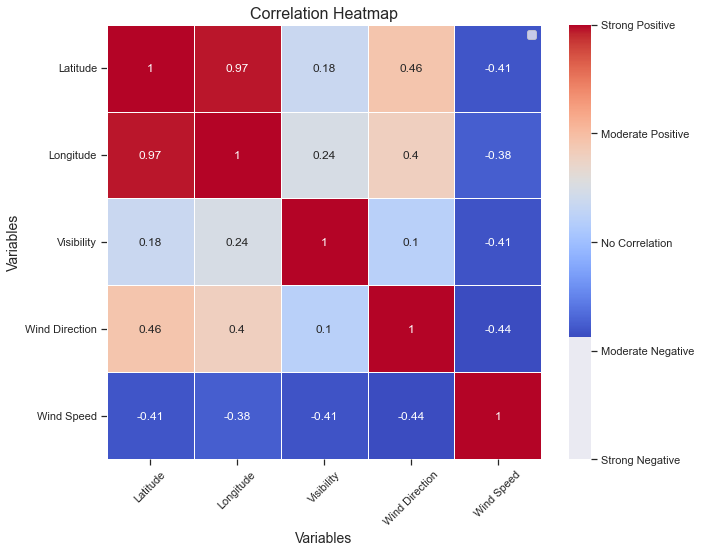

In [88]:
plt.figure(figsize=(10, 8)) # Set the figure size

# Calculate the correlation matrix for the selected data
correlation_matrix = selected_data.corr()

# Customize the heatmap
plt.title('Correlation Heatmap', fontsize = 16)  # Add a title to the heatmap
sns.set(font_scale = 1.0)  # Set the font scale for better readability

# Create the heatmap with annotations and a color map
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)

# Customize the color bar
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])  # Set color bar ticks
cbar.set_ticklabels(['Strong Negative', 'Moderate Negative', 'No Correlation', 'Moderate Positive', 'Strong Positive'])

# Add a legend and labels
plt.legend(loc='best')
plt.xlabel('Variables', fontsize = 14)
plt.ylabel('Variables', fontsize = 14)

# Rotate the tick labels for better visibility
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)

# Show the plot
plt.show()

## Metrics, Confusion Matrix, ROC/AUC, and Cross Validation

In [120]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Assuming 'target_variable' is your binary classification target
target_variable = 'Ice Accretion On Ship'

# Drop rows with missing values in the selected columns
data = data.dropna(subset=[target_variable] + selected_columns)
data[target_variable] = pd.to_numeric(data[target_variable], errors='coerce')
data.dropna(inplace=True)  # Drop rows with NaN values

# Select features for classification
classification_features = ['Latitude', 'Longitude', 'Sea Level Pressure', 'Air Temperature', 'Sea Surface Temperature', 'Wave Height', 'Total Cloud Amount', 'Visibility', 'Wind Direction', 'Wind Speed']

# Check if there are enough samples for the train-test split
if data.shape[0] < 2:
    print("Insufficient data for train-test split.")
else:
    # Use stratified sampling for the train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        data[classification_features],
        data[target_variable],
        test_size=0.2,
        random_state=0,
        stratify=data[target_variable]  # Add stratify parameter
    )

    # Check if there are enough samples for the train-test split
    if len(X_train) == 0 or len(X_test) == 0:
        print("Insufficient data for train-test split.")
    else:
        # Continue with the rest of your code
        # Train a RandomForestClassifier
        classifier = RandomForestClassifier(random_state=0)
        classifier.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = classifier.predict(X_test)

        # Create a confusion matrix
        cm = confusion_matrix(y_test, predictions)

        # Display the confusion matrix
        print("Confusion Matrix:")
        print(cm)

        # Plot the confusion matrix
        plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
        plt.title('Normalized Confusion Matrix')
        plt.show()

        # Calculate ROC/AUC
        probabilities = classifier.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, probabilities)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

        # Cross-validation
        cv_scores = cross_val_score(classifier, data[classification_features], data[target_variable], cv=5, scoring='accuracy')
        print("Cross-validation Accuracy Scores:", cv_scores)
        print("Mean Accuracy:", np.mean(cv_scores))

Insufficient data for train-test split.


In [ ]:
#Save the statistics to a CSV file
statistics.to_csv('climate_statistics.csv')

#Save the cleaned data to a new CSV file
selected_data.to_csv('cleaned_climate_data.csv', index = False)